# Abertura dos arquivos

Configurações iniciais para iniciar exploração

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import gc
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ajuda a otimizar o uso da memória (mais info: https://www.geeksforgeeks.org/garbage-collection-python/)
gc.enable()

Função para colher 1as impressões do df:

In [3]:
def summary_info_df (df):
    print ("Rows     : " ,df.shape[0])
    print ("Columns  : " ,df.shape[1])
    print ("\nFeatures : \n" ,df.columns.tolist())
    print ("\nMissing values :  ", df.isnull().sum().values.sum())
    print ("\nUnique values :  \n",df.nunique())
    print ("\nData Types :  \n",df.dtypes)

Leitura preliminar dos arquivos

In [4]:
acquisition = pd.read_csv('data/acquisition_train.csv')
acquisition.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [5]:
summary_info_df(acquisition)

Rows     :  45000
Columns  :  43

Features : 
 ['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months', 'credit_limit', 'reason', 'income', 'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 'application_time_applied', 'application_time_in_funnel', 'email', 'external_data_provider_credit_checks_last_2_year', 'external_data_provider_credit_checks_last_month', 'external_data_provider_credit_checks_last_year', 'external_data_provider_email_seen_before', 'external_data_provider_first_name', 'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel', 'profile_phone_number', 'reported_income', 'shipping_state', 'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud']

Missing values :   219437

Unique values :  
 ids                                                 45000
target_

In [5]:
spend = pd.read_csv('data/spend_train.csv')
spend.head()

,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs
0,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,0,6305.06,35.56,1,0.00
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,1,4199.99,3406.59,0,0.00
2,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,2,7167.94,0.00,0,0.00
3,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,3,16631.05,0.00,1,5.55
4,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,4,115.29,0.00,0,6.89


In [5]:
summary_info_df(spend)

NameError: name 'spend' is not defined

In [6]:
teste = pd.read_csv('data/acquisition_test.csv')

In [9]:
summary_info_df(teste)

Rows     :  19592
Columns  :  41

Features : 
 ['ids', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months', 'credit_limit', 'reason', 'income', 'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 'application_time_applied', 'application_time_in_funnel', 'email', 'external_data_provider_credit_checks_last_2_year', 'external_data_provider_credit_checks_last_month', 'external_data_provider_credit_checks_last_year', 'external_data_provider_email_seen_before', 'external_data_provider_first_name', 'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel', 'profile_phone_number', 'reported_income', 'shipping_state', 'shipping_zip_code', 'profile_tags', 'user_agent']

Missing values :   74559

Unique values :  
 ids                                                 19592
score_1                                   

# Data Cleaning

In [7]:
acquisition.reported_income.replace([np.inf, -np.inf], np.nan, inplace = True)

In [8]:
teste.reported_income.replace([np.inf, -np.inf], np.nan, inplace = True)

### Modificações Preliminares

In [7]:
#from datetime import datetime
#datetime.strptime(acquisition.application_time_applied, '%H:%M:%S')
#acquisition.application_time_applied = acquisition.application_time_applied.map(lambda x: datetime.strptime(x, '%H:%M:%S'))
# valores como 00:60:02 inviabilizam o rolê

Separação do DF de treino dos targets e formação do combo set.

In [23]:
acquisition_bl_X = acquisition.iloc[:, 2:-1]
acquisition_bl_y = acquisition['target_default'].astype('bool')
fraud_bl_y = acquisition['target_fraud']
combo_x_bl = pd.concat([acquisition_bl_X, teste.iloc[:, 1:]])

Variáveis descartadas por não terem informação facilmente obtíveis, ou conseguidas via outras variáveis. Poderiam ser melhor trabalhadas em outra oportunidade: lat_lon (poderia dar origem a 2 features novas para realização de clusterização, ou analisar a interação quantitativa da região), application_time_applied (se se entendesse a raiz do problema com horários com 60 min), external_data_provider_first_name (NLP, embora a maioria dos nomes não se repita).

In [24]:
discVars = ['zip', 'job_name', 'lat_lon', 'profile_phone_number', 'application_time_applied','shipping_zip_code', 'profile_tags',
            'user_agent', 'reason', 'external_data_provider_first_name']
combo_x_bl[discVars]

,zip,job_name,lat_lon,profile_phone_number,application_time_applied,shipping_zip_code,profile_tags,user_agent,reason,external_data_provider_first_name
0,Ernn+uVXCMq/6ARrBCcd+A==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,"(-29.151545708122246, -51.1386461804385)",514-9840782,07:52:34,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,leidelaura
1,rlWIXTBO+VOa34+SpGyhlQ==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,"(-19.687710705798963, -47.94151536525154)",251-3659293,02:34:29,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,diocezio
2,PjTIDfJsK0DKL9fO7vuW2g==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,"(-28.748023890412284, -51.867279334353995)",230-6097993,00:60:02,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,veralucia
3,Cc/kWDLQH3dpHv5HU+pLVA==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,"(-17.520650158450454, -39.75801139933186)",261-3543751,11:20:49,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,venice
4,i036nmJ7rfxo+3EvCD7Jnw==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,"(-16.574259446978008, -39.90990074785962)",102-3660162,13:39:03,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,darzisa
5,kfWDI5wYFHdi9PtKFI9EPg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,"(-6.762413011455668, -35.13224579733013)",787-1678197,05:27:02,55266,"{'tags': ['c1', 'n3', 'n9']}",Mozilla/5.0 (Linux; Android 6.0.1; Nexus 6P Bu...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,teomar
6,3k2JCQ8Bp5oDwaI39ZJgHA==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,"(-22.90356694722871, -47.12093338650089)",185-7402507,08:19:45,47408,{'tags': ['n3']},Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like M...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,weigma
7,kT9iINxmEtNoxGqiEuuu1w==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,"(-8.39950627124774, -46.207331472395396)",503-9012277,17:58:42,36168,"{'tags': ['n15', 'c55', 'n14', 'n8', 'n3']}","Mozilla/5.0 (iPhone9,4; U; CPU iPhone OS 10_0_...",mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,orna
8,IS7hpLnmcFmoFQx5fYolyA==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,"(-21.22575737036379, -44.595846539016456)",750-4705041,15:04:47,49289,"{'tags': ['n14', 'n15', 'n6']}",Mozilla/5.0 (Apple-iPhone7C2/1202.466; U; CPU ...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,cleuber
9,FcreDj8X5CjkLfqOjlBKIQ==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,"(-16.61107269517449, -49.34324651918292)",132-3263001,04:47:22,45389,"{'tags': ['n9', 'pro+aty', 'n2', 'n1']}",Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:15....,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,elisete


Colunas com apenas 1 valor relevante também serão excluídas.

In [25]:
noVar = [feature for feature in combo_x_bl.columns if combo_x_bl[feature].nunique() == 1]
noVar

['channel', 'external_data_provider_credit_checks_last_2_year']

In [26]:
combo_x_bl.drop(discVars, axis = 1, inplace = True)

combo_x_bl.drop(noVar, axis = 1, inplace = True)
combo_x_bl.reset_index(inplace=True)

In [27]:
from sklearn.preprocessing import LabelEncoder
def do_labelEncoding(df, columns, drop = True):
    for column in columns:
        df[column+'_label'] = LabelEncoder().fit_transform(df[column].astype(str))
        df.drop(column, axis = 1, inplace = drop)
    return df

In [31]:
catFeatures = [feature for feature in combo_x_bl.columns if len(combo_x_bl[feature].unique()) <= 51 and 'n_' not in feature]
combo_x_bl[catFeatures]

,score_1,score_2,facebook_profile,state,real_state,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,marketing_channel,shipping_state
0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,True,sjJbkqJS7cXalHLBFA+EOQ==,N5/CE7lSkAfB04hVFFwllw==,outlook.com,2,0.0,Invite-email,BR-MT
1,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,False,xsd3ZdsI3356I3xMxZeiqQ==,N5/CE7lSkAfB04hVFFwllw==,gmail.com,1,0.0,Radio-commercial,BR-RS
2,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,NaN,Ygq6MsM98oC8yceExr69Ig==,n+xK9CfX0bCn77lClTWviw==,gmail.com,2,NaN,Waiting-list,BR-RR
3,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,False,KET/Pmr6rHp1RJ/P9ymztw==,n+xK9CfX0bCn77lClTWviw==,spgov.com,3,NaN,Waiting-list,BR-RN
4,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,True,xsd3ZdsI3356I3xMxZeiqQ==,n+xK9CfX0bCn77lClTWviw==,gmail.com,2,1.0,Invite-email,BR-MT
5,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,False,JrdZzPZEa/YIIGwh8OdTKA==,N5/CE7lSkAfB04hVFFwllw==,gmail.com,2,1.0,Website,BR-SP
6,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,False,xsd3ZdsI3356I3xMxZeiqQ==,n+xK9CfX0bCn77lClTWviw==,gmail.com,2,0.0,Twitter,BR-SP
7,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,True,orU7WJYGPT/xFwOXY1eBkw==,N5/CE7lSkAfB04hVFFwllw==,outlook.com,3,0.0,Waiting-list,BR-AC
8,4DLlLW62jReXaqbPaHp1vQ==,tQUTfUyeuGkhRotd+6WjVg==,True,xsd3ZdsI3356I3xMxZeiqQ==,n+xK9CfX0bCn77lClTWviw==,spgov.com,0,NaN,Website,BR-MS
9,e4NYDor1NOw6XKGE60AWFw==,cdpgyOyZS04uXerMNu7uCw==,False,P1TKs1aii8osbgO+MszZ2w==,N5/CE7lSkAfB04hVFFwllw==,hotmail.com,2,0.0,Facebook,BR-PE


In [32]:
do_labelEncoding(combo_x_bl, catFeatures)

,index,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,...,score_1_label,score_2_label,facebook_profile_label,state_label,real_state_label,email_label,external_data_provider_credit_checks_last_month_label,external_data_provider_credit_checks_last_year_label,marketing_channel_label,shipping_state_label
0,0,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,...,0,10,1,45,1,4,2,0,2,12
1,1,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,100018.91,...,3,16,0,48,1,0,1,0,5,20
2,2,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,65023.65,...,3,9,2,32,3,0,2,2,7,19
3,3,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,68830.01,...,0,21,0,23,3,5,3,2,7,17
4,4,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,60011.29,...,2,1,1,48,3,0,2,1,2,12
5,5,300.0,101.837040,0.915389,90.711273,0.44,NaN,NaN,61055.0,75024.28,...,2,1,0,22,1,0,2,1,8,23
6,6,250.0,98.958914,0.901736,108.609675,0.43,NaN,NaN,NaN,49234.65,...,0,21,0,48,3,0,2,0,6,23
7,7,330.0,100.342564,0.491610,115.954187,0.33,NaN,NaN,42666.0,80024.60,...,3,9,1,42,1,4,3,0,7,0
8,8,510.0,95.201098,0.559745,94.657281,0.33,5019.53,60.0,NaN,31019.09,...,1,31,1,48,3,5,0,2,8,11
9,9,390.0,97.608652,0.444594,102.905688,0.36,NaN,NaN,16291.0,45026.26,...,4,19,0,27,1,2,2,0,0,15


In [33]:
combo_x_bl.dtypes

index                                                      int64
score_3                                                  float64
score_4                                                  float64
score_5                                                  float64
score_6                                                  float64
risk_rate                                                float64
last_amount_borrowed                                     float64
last_borrowed_in_months                                  float64
credit_limit                                             float64
income                                                   float64
ok_since                                                 float64
n_bankruptcies                                           float64
n_defaulted_loans                                        float64
n_accounts                                               float64
n_issues                                                 float64
application_time_in_funne

Separação de Teste e Treino

In [37]:
# Separando os dados em teste e treino
X_bl_treino = combo_x_bl.iloc[0:45000, 1:]
X_bl_teste = combo_x_bl.iloc[45001:, 1:]

# EDA 

In [48]:
pd.concat([X_bl_treino,do_labelEncoding(acquisition[['target_default', 'target_fraud']], ['target_default', 'target_fraud'], drop = False)], axis = 1).columns

Index(['score_3', 'score_4', 'score_5', 'score_6', 'risk_rate',
       'last_amount_borrowed', 'last_borrowed_in_months', 'credit_limit',
       'income', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans',
       'n_accounts', 'n_issues', 'application_time_in_funnel',
       'external_data_provider_email_seen_before',
       'external_data_provider_fraud_score', 'reported_income',
       'score_1_label', 'score_2_label', 'facebook_profile_label',
       'state_label', 'real_state_label', 'email_label',
       'external_data_provider_credit_checks_last_month_label',
       'external_data_provider_credit_checks_last_year_label',
       'marketing_channel_label', 'shipping_state_label', 'target_default',
       'target_fraud', 'target_default_label', 'target_fraud_label'],
      dtype='object')

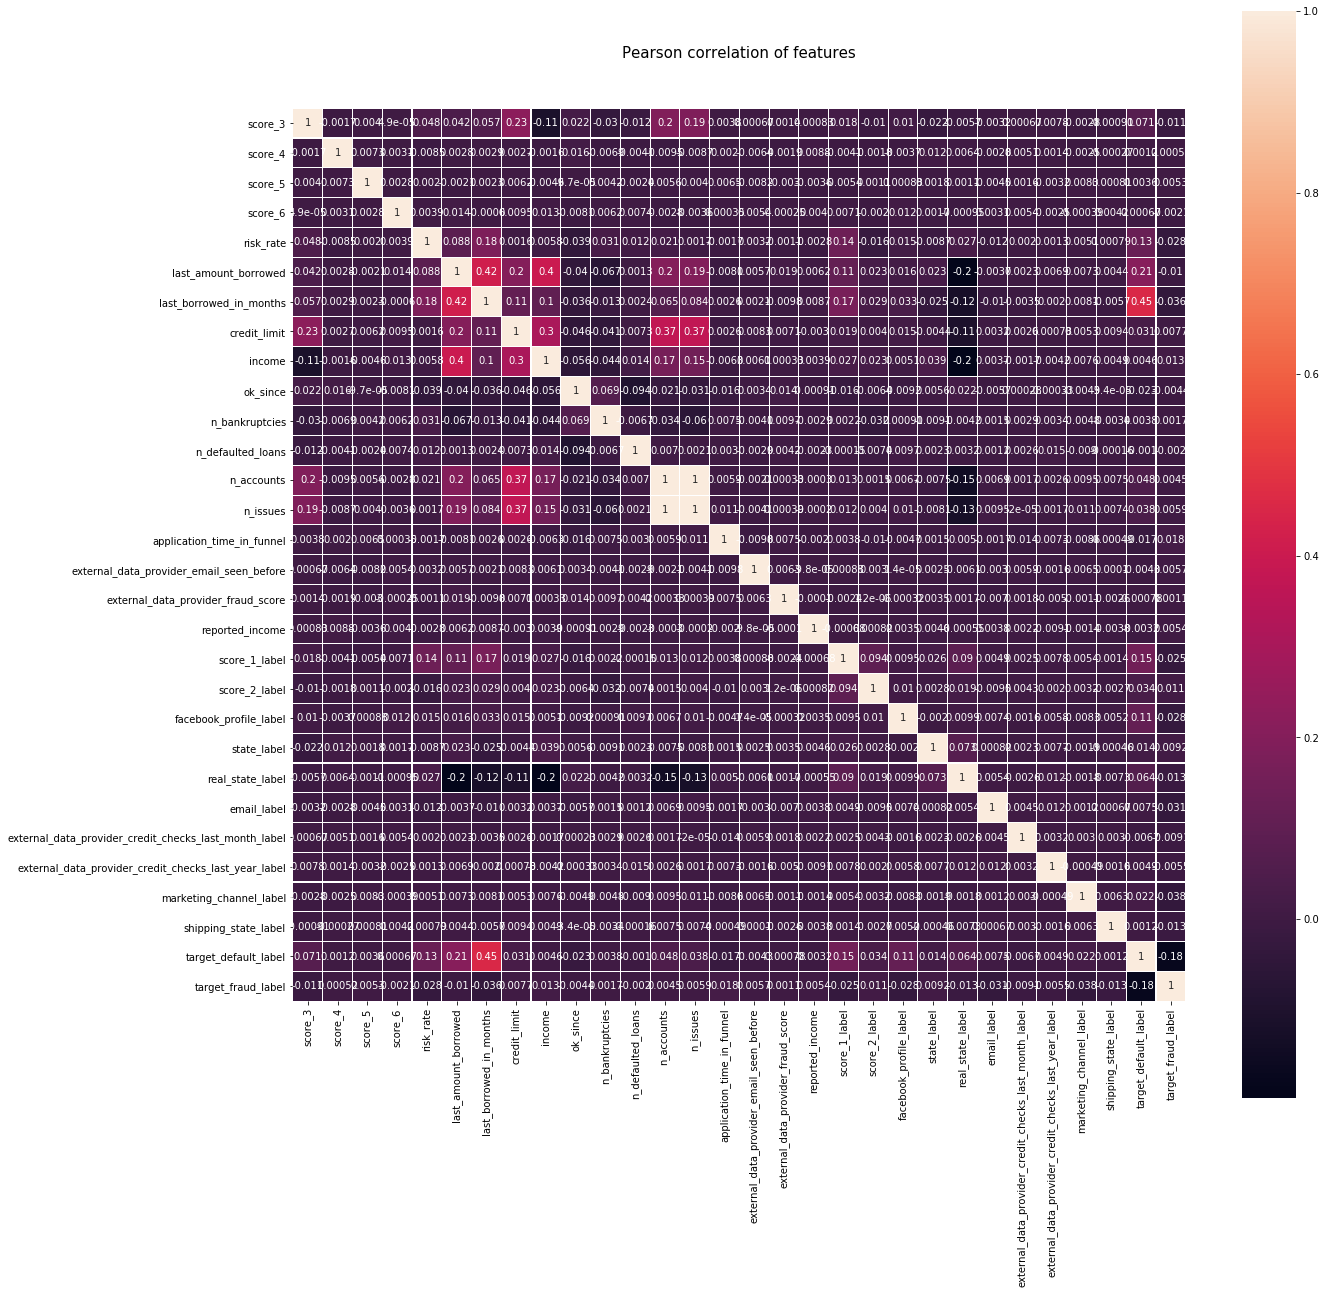

In [49]:
plt.figure(figsize=(20,20))
plt.title('Pearson correlation of features', y=1.05, size=15)
sns.heatmap(pd.concat([X_bl_treino,do_labelEncoding(acquisition[['target_default', 'target_fraud']], 
                                                    ['target_default', 'target_fraud'], drop = False)], axis = 1).corr(), 
            linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True)

### 1.1

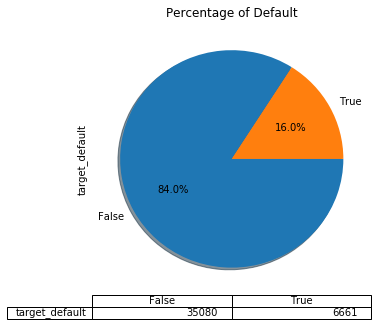

In [21]:
plt.figure(figsize=(5,5))

plt.title('Percentage of Default')
acquisition['target_default'].value_counts().plot(kind='pie', table=True, autopct='%1.1f%%',
counterclock=False, shadow=True)

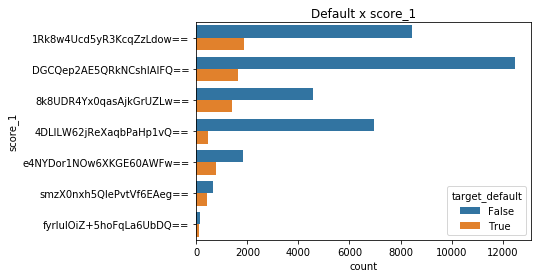

In [10]:
plt.title('Default x score_1')
sns.countplot(y = 'score_1', hue = 'target_default', data = acquisition)

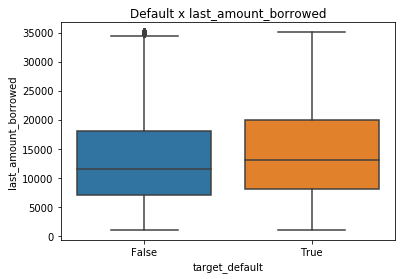

In [9]:
plt.title('Default x last_amount_borrowed')
sns.boxplot(y = 'last_amount_borrowed', x = 'target_default', data = acquisition)

###  1.2

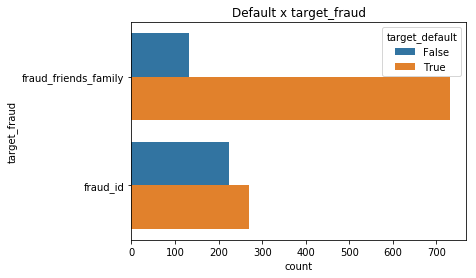

In [11]:
plt.title('Default x target_fraud')
sns.countplot(y = 'target_fraud', hue = 'target_default', data = acquisition)

Boa indicação de que, talvez, não seja a melhor abordagem considerá-los um mesmo tipo apenas de fraude tendo em vista que a incidência de default é muito maior em fraud_friends_family

### 1.3

Text(0.5,1,'pv_3m')

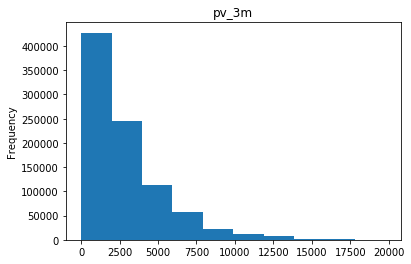

In [6]:
spend.groupby(['ids', 'credit_line']).spends.rolling(3).mean().plot(kind = 'hist')
plt.title('pv_3m')

Boa indicação de como os gastos, na média, são muito concentrados em alguns valores com uns poucos outliers, assim utilizar uma abordagem que envolva o log dos gastos pode ajudar.

# Baseline Approach

One Hot Encoding das variáveis

In [67]:
def create_dummies(df,column_names, limit = 51):
    df = df.copy()
    for feature in column_names:
        if len(df[feature].unique())>2 and len(df[feature].unique()) <= limit:
            dummies = pd.get_dummies(df[feature],prefix=feature,dummy_na=True, drop_first = False) # não sei ao certo se caga colocar true
            df = pd.concat([df,dummies],axis=1)
            df.drop(feature, axis = 1, inplace = True)
    return df

In [299]:
combo_x_bl_ohe = create_dummies(combo_x_bl, combo_x_bl.columns)
for feature in acquisition_ohe.columns:
    if acquisition_ohe[feature].nunique() == 1:
        acquisition_ohe.drop([feature], axis = 1, inplace = True)

### Missing Values

In [300]:
combo_x_bl_ohe.fillna(-1, inplace=True)

### Array de Propensão a gasto

In [56]:
id_spends = spend.groupby('ids').spends.mean()
spend_bl_y = acquisition_bl[['ids']].join(id_spends, on = 'ids', how = 'left')
spend_bl_y.drop(['ids'], axis = 1, inplace = True); spend_bl_y.head()

,spends
0,853.378929
1,1257.403200
2,634.263636
3,3877.269231
4,1373.506190


### Array de Fraude

Abordagem inicial considerando todos os tipos de fraude como um só e os NaN como não fraudulentos.

In [59]:
fraud_bl_y.replace(np.nan, False, inplace = True)
fraud_bl_y.loc[fraud_bl_y != False] = True; fraud_bl_y.head()

0    False
1    False
2    False
3    False
4    False
Name: target_fraud, dtype: bool

### Baseline Models

Parâmetros comuns a todo o trabalho

In [301]:
# Definindo o tamanho das amostras
teste_size = 0.3

# Garante que os resultados podem ser reproduzidos
seed = 666

# Quantidade de CV a serem usadas
num_folds = 5


Funções para otimizar teste de diversos modelos junto a CVs e avaliar desempenho nos dados de teste

In [61]:
# Import do módulo
from sklearn import model_selection
from sklearn.metrics import roc_auc_score, mean_squared_error

## Função para comparação
def compara_cv_modelos (X, y, modelos, num_folds = num_folds, seed = seed, scoring = 'roc_auc', Stratified = False):
    # Avaliando cada modelo
    resultados = []
    nomes = []
    
    for nome, modelo in modelos:
        if Stratified:
            kfold = model_selection.StratifiedKFold(n_splits = num_folds, random_state = seed)# stratified é necessário para class imbalance 
        else:
            kfold = model_selection.KFold(n_splits = num_folds, random_state = seed)
            
        cv_results = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = scoring)
        resultados.append(cv_results)
        nomes.append(nome)
        msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
        print(msg)
   # Boxplot para comparar os algoritmos
    fig = plt.figure()
    fig.suptitle('Comparação de Algoritmos de Classificação')
    ax = fig.add_subplot(111)
    plt.boxplot(resultados)
    ax.set_xticklabels(nomes)
    plt.show() 
    
def eval_model_c(X_treino, X_teste, y_treino, y_teste, modelos):
    for nome,modelo in modelos:
        modelo.fit(X_treino, y_treino)
        # Compute predicted probabilities: y_pred_prob
        y_pred_prob = modelo.predict_proba(X_teste)[:,1]
        # Compute and print AUC score
        msg = "%s: %f" % (nome, roc_auc_score(y_teste, y_pred_prob))
        print(msg)

def eval_model_r(X_treino, X_teste, y_treino, y_teste, modelos):
    for nome,modelo in modelos:
        modelo.fit(X_treino, y_treino)
        # Compute predicted values
        y_pred = modelo.predict(X_teste)
        # Compute and print AUC score
        msg = "%s: %f" % (nome, mean_squared_error(y_teste, y_pred))
        print(msg)

Tupples de algorítmos de regressão e classificação

In [62]:
## Classificação

# Import dos módulos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC # só usarei quando houver menos dimensões, senão demora demais para treinar
from xgboost import XGBClassifier

# Preparando os modelo
modelos_cla = []
modelos_cla.append(('LR', LogisticRegression()))
modelos_cla.append(('LDA', LinearDiscriminantAnalysis()))
modelos_cla.append(('NB', GaussianNB()))
#modelos_cla.append(('KNN', KNeighborsClassifier()))
modelos_cla.append(('RF', RandomForestClassifier()))
#modelos.append(('SVM', SVC()))
modelos_cla.append(('XGB', XGBClassifier()))

## Regressão
# Import dos módulos
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
#from sklearn.svm import SVC
from xgboost import XGBRegressor

# Preparando os modelo
modelos_reg = []
modelos_reg.append(('LR', LinearRegression()))
modelos_reg.append(('EN', ElasticNet()))
#modelos_reg.append(('KNN', KNeighborsRegressor()))
modelos_reg.append(('RF', RandomForestRegressor()))
#modelos_reg.append(('SVM', SVC()))
modelos_reg.append(('XGB', XGBRegressor()))


### Risco de Crédito

Retirada das observações com missing na variável target.

In [303]:
acquisition_bl_y.dropna(inplace = True)
X_bl_treino_credit = X_bl_treino.iloc[acquisition_bl_y.index, :]

Call da função com os parâmetros definidos acima.

LR: 0.500203 (0.009146)
LDA: 0.711310 (0.011535)
NB: 0.544377 (0.012635)
KNN: 0.521468 (0.009430)
RF: 0.635216 (0.015266)
XGB: 0.724609 (0.010988)


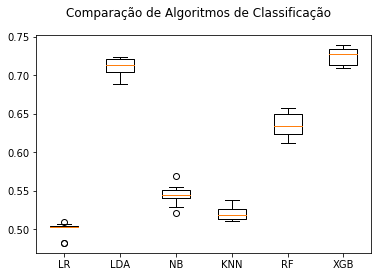

In [304]:
compara_cv_modelos (X_bl_treino_credit, acquisition_bl_y, modelos_cla, Stratified = True)

### Propensão a Gasto

Call da Função.

LR: -4593266.939226 (42632.542036)
EN: -4578097.910387 (46708.668876)
KNN: -5507502.103345 (59055.680026)
RF: -5107391.413683 (62379.860014)
XGB: -4588207.484619 (48358.222500)


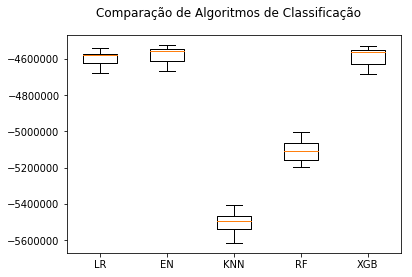

In [305]:
# Function call
compara_cv_modelos (X_bl_treino, spend_bl_y, modelos_reg, scoring = 'neg_mean_squared_error')

### Risco de Fraude

Call da Função

LR: 0.495635 (0.034184)
LDA: 0.672795 (0.018409)
NB: 0.522344 (0.029659)
KNN: 0.498901 (0.017728)
RF: 0.580270 (0.017247)
XGB: 0.756240 (0.017751)


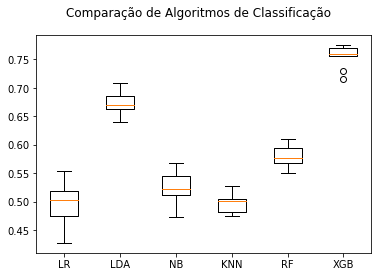

In [306]:
compara_cv_modelos (X_bl_treino, fraud_bl_y, modelos_cla, Stratified = True)

# Feature Engineering

### Modificações Preliminares

Separação dos Targets e junção com os dados de teste para criação do Combo Set.

In [279]:
acquisition_fe_y = acquisition['target_default'].astype('bool')
fraud_fe_y = acquisition['target_fraud']
acquisition_X = acquisition.iloc[:, 2:-1]
combo_x = pd.concat([acquisition_X, teste.iloc[:, 1:]])

In [207]:
combo_x.drop(['zip', 'job_name', 'lat_lon', 'profile_phone_number', 'application_time_applied',
                     'shipping_zip_code', 'profile_tags', 'user_agent', 'reason', 
                     'external_data_provider_first_name'], axis = 1, inplace = True)

combo_x.drop(['channel', 'external_data_provider_credit_checks_last_2_year'], axis = 1, inplace = True)
combo_x.drop(['shipping_state'], axis = 1, inplace = True)# shipping_state está contida em state se a premissa for correta
combo_x.reset_index(inplace=True)

### Missing Values

In [104]:
# colunas com missing values
missingValueColumns = combo_x.columns[combo_x.isnull().any()].tolist()
combo_x_null = combo_x[missingValueColumns] 

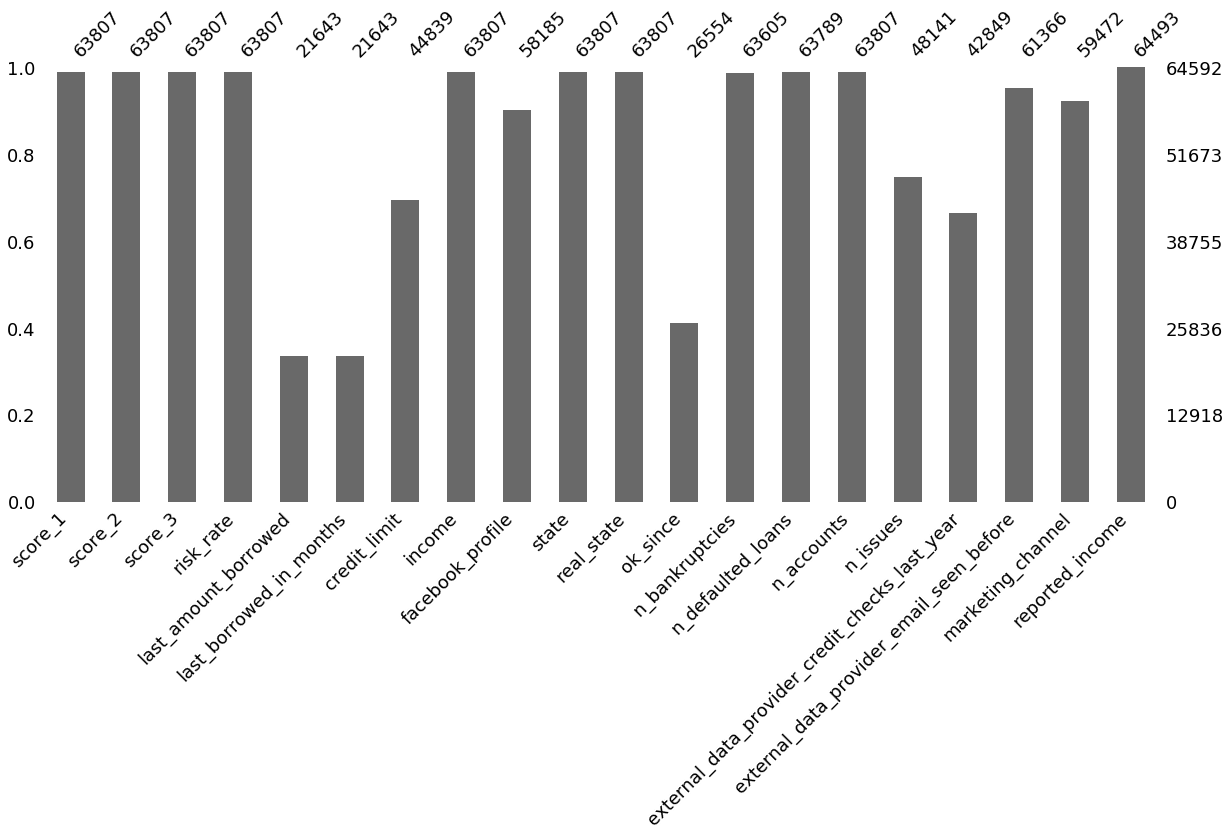

In [105]:
msno.bar(combo_x_null,figsize=(20,8),fontsize=18,labels=True)

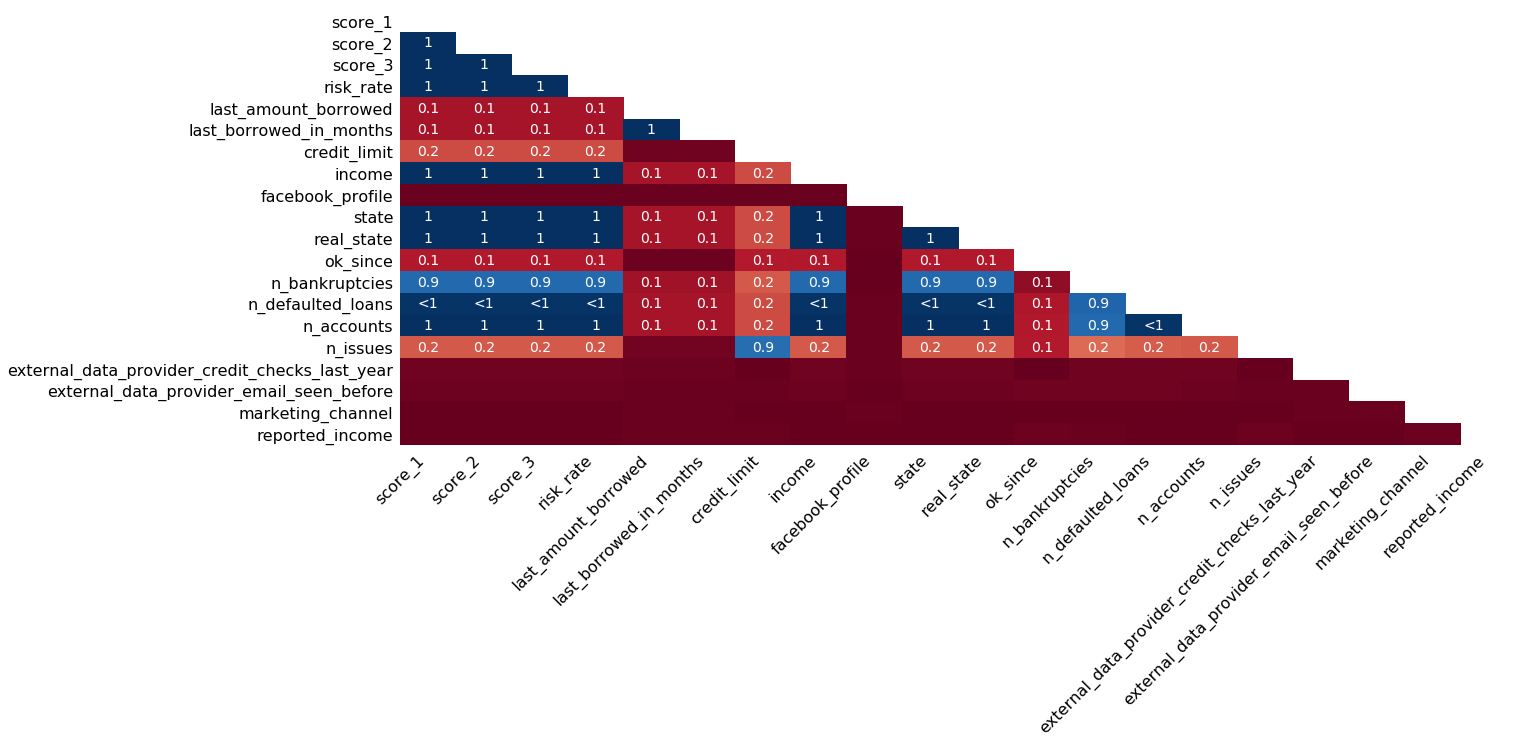

In [106]:
msno.heatmap(combo_x_null,figsize=(20,8))

Análise dos missings altamente correlacionados

In [160]:
combo_x.score_1.isnull().sum()

785

In [162]:
combo_x.loc[combo_x.score_1.isnull(), :].index

Int64Index([  139,   225,   272,   382,   434,   458,   472,   581,   652,
              675,
            ...
            63815, 63872, 63962, 64115, 64146, 64205, 64346, 64366, 64394,
            64523],
           dtype='int64', length=785)

Seria interessante investigar a fonte geradora dos dados, porque, assim como visto acima, possivelmente os missings não foram aleatórios, no entanto, pela baixa representatividade em relação à amostra total, farei a imputação de forma corriqueira.

Demais ações em relação aos outros missings

Protocolo:
- menor 0.5: ou serão mexidas, ou descartadas
- maior 0.5: amostra considerável para se realizar imputação por média (a princípio)

Features abaixo:
- last_amount_borrowed, last_borrowed_in_months, ok_since: como não há indicações nos dados, assumirei que os NaN são zeros (não tomaram)

In [208]:
combo_x.last_amount_borrowed.replace(np.nan, 0, inplace = True)
combo_x.last_borrowed_in_months.replace(np.nan, 0, inplace = True)
combo_x.ok_since.replace(np.nan, 0, inplace = True)

In [221]:
from sklearn.preprocessing import Imputer

def df_imputer (df,column_names, limit = 51):
    df = df.copy()
    imp = Imputer(missing_values=np.nan, strategy='mean')
    for feature in column_names:
        if len(df[feature].unique()) > limit:
            imputed = imp.fit_transform(df[[feature]])
            imputed_df = pd.DataFrame(imputed, columns = [feature+'_imp'])
            df = pd.concat([df,imputed_df],axis=1)
            df.drop(feature, axis = 1, inplace = True)
    return df

In [223]:
combo_x_imp = df_imputer(combo_x, combo_x.columns[combo_x.isnull().any()])
# gambiarra para pegar n_accounts
combo_x_imp = df_imputer(combo_x_imp, combo_x_imp[['n_accounts']].columns, limit=43)

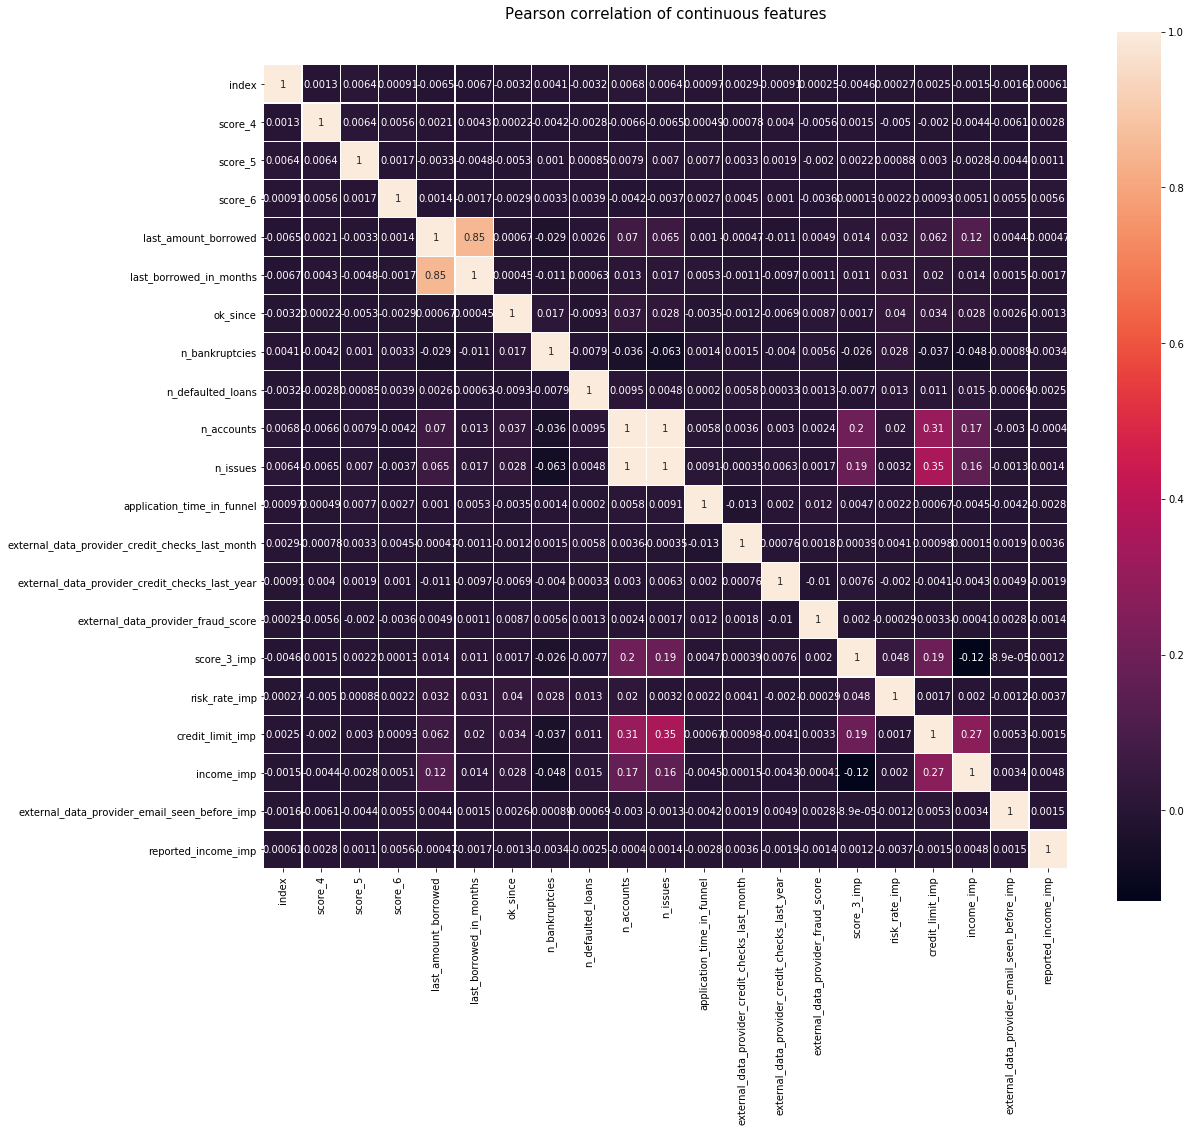

In [176]:
plt.figure(figsize=(18,16))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(combo_x_imp.corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

Por algum motivo, n_account e n_issue são idênticas. Optarei por retirar n_issues, mas é algo bem estranho.

In [225]:
combo_x_imp.drop(['n_issues'], axis = 1, inplace = True)

### Normalização das Features numéricas

In [212]:
from sklearn.preprocessing import StandardScaler
def do_scalling(df,column_names, limit = 51):
    df = df.copy()
    ss = StandardScaler()
    for feature in column_names:
        if len(df[feature].unique()) > limit:
            scaled = ss.fit_transform(df[[feature]])
            scaled_df = pd.DataFrame(scaled, columns = [feature+'_norm'])
            df = pd.concat([df,scaled_df],axis=1)
            df.drop(feature, axis = 1, inplace = True)
    return df

In [228]:
combo_x_norm = do_scalling(combo_x_imp, combo_x_imp.iloc[:, 1:].columns)
# gambiarra para conseguir pegar o n_accounts
combo_x_norm = do_scalling(combo_x_norm, combo_x_norm[['n_accounts_imp']].columns, limit = 43)

Index(['index', 'score_1', 'score_2', 'last_borrowed_in_months',
       'facebook_profile', 'state', 'real_state', 'n_bankruptcies',
       'n_defaulted_loans', 'email',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year', 'marketing_channel',
       'score_4_norm', 'score_5_norm', 'score_6_norm',
       'last_amount_borrowed_norm', 'ok_since_norm',
       'application_time_in_funnel_norm',
       'external_data_provider_fraud_score_norm', 'score_3_imp_norm',
       'risk_rate_imp_norm', 'credit_limit_imp_norm', 'income_imp_norm',
       'external_data_provider_email_seen_before_imp_norm',
       'reported_income_imp_norm', 'n_accounts_imp_norm'],
      dtype='object')

### One Hot Encoding

In [229]:
# n_issues é numerica e possui valores baixos
combo_x_ohe = create_dummies(combo_x_norm, 
                                    combo_x_norm.iloc[:, combo_x_norm.columns != 'n_accounts_imp_norm'].columns)
for feature in combo_x_ohe.columns:
    if combo_x_ohe[feature].nunique() == 1:
        combo_x_ohe.drop([feature], axis = 1, inplace = True)

index                                                  45000
score_4_norm                                           64592
score_5_norm                                           64592
score_6_norm                                           64592
last_amount_borrowed_norm                              20169
ok_since_norm                                            104
application_time_in_funnel_norm                          501
external_data_provider_fraud_score_norm                 1001
score_3_imp_norm                                          89
risk_rate_imp_norm                                        83
credit_limit_imp_norm                                  28260
income_imp_norm                                        57431
external_data_provider_email_seen_before_imp_norm         63
reported_income_imp_norm                               54714
n_accounts_imp_norm                                       46
score_1_1Rk8w4Ucd5yR3KcqZzLdow==                           2
score_1_4DLlLW62jReXaqbP

### Array de Propensão a Gasto

Logaritimização da Feature para normalizar distribuição dos valores

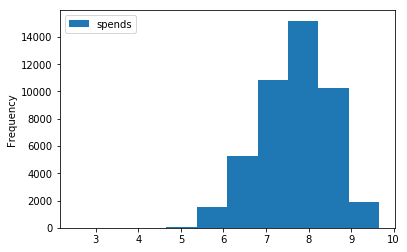

In [248]:
spend_fe_y = spend_bl_y
spend_fe_y_ln = np.log(spend_fe_y)
spend_fe_y_ln.plot.hist()

### Array de Risco de Fraude

Seria interessante criar um modelo multiclassificação devido ao diferente impacto que as 2 categorias de fraude possuem, porém, como não fica clara a possbildiade neste desafio, optarei pela abordagem mais simples identica a do baseline.

In [280]:
fraud_fe_y.replace(np.nan, False, inplace = True)
fraud_fe_y.loc[fraud_bl_y != False] = True; fraud_fe_y.head()

0    False
1    False
2    False
3    False
4    False
Name: target_fraud, dtype: bool

### FE Models

Serão repetidas as mesmas etapas executadas acima, usando os mesmos parâmetros para verificar se houve os ganhos esperados com as transformações.

Separação em Dados de Teste e Treino

In [246]:
# Separando o array em componentes de input e output
X_treino = combo_x_ohe.iloc[0:45000, 1:]
X_teste = combo_x_ohe.iloc[45001:, 1:]

### Risco de Crédito

Retirada das observações com missing na variável target.

In [281]:
acquisition_fe_y.dropna(inplace = True)
X_treino_credit = X_treino.iloc[acquisition_fe_y.index, :]

Import dos módulos, escolha dos modelos e call da função

LR: 0.713179 (0.010764)
LDA: 0.710671 (0.010983)
NB: 0.664042 (0.010683)
KNN: 0.581962 (0.014488)
RF: 0.640679 (0.011228)
XGB: 0.725096 (0.011449)


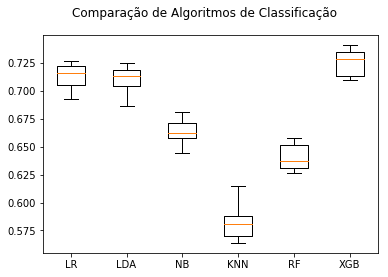

In [307]:
# Function call
compara_cv_modelos(X_treino_credit, acquisition_fe_y, modelos_cla, Stratified = True)

Score dos melhores modelos nos dados de teste

### Propensão a Gasto

Vale resaltar que optei por não usar a versão logaritmizada da variável target, pois os modelos não conseguiam criar features adequadas para a previsão, sendo sua própria média o melhor tomador de decisão, assim prossegui os testes com o mesmo target usado no início do trabalho.

Call da função.

LR: -12522768860223088300654592.000000 (36497083399786078077452288.000000)
EN: -4577698.652120 (46678.705124)
KNN: -5499238.311924 (63691.174911)
RF: -5116010.492901 (52073.623914)
XGB: -4591517.038744 (46353.486628)


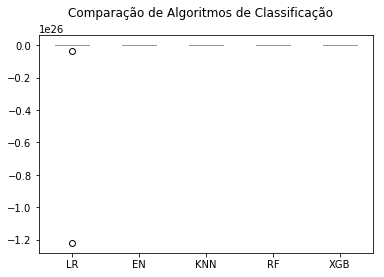

In [308]:
# Function call
compara_cv_modelos (X_treino, spend_fe_y, modelos_reg, scoring = 'neg_mean_squared_error')

### Risco de Fraude

Call da Função

LR: 0.656307 (0.018987)
LDA: 0.654249 (0.020058)
NB: 0.523229 (0.011030)
KNN: 0.509039 (0.011768)
RF: 0.594537 (0.017042)
XGB: 0.750393 (0.015080)


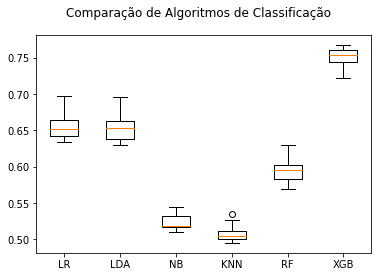

In [309]:
compara_cv_modelos (X_treino, fraud_fe_y, modelos_cla, Stratified = True)

Com exceção do Risco de Fraude, todos os modelos demonstraram uma melhora de performance na média após a engenharia das variáveis. Por fim, usarei os modelos com melhor desempenho para realizar sua otimização.

### Otimizações

Parâmetros a serem otimizados por modelo.

In [310]:
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

param_xgb = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

Risco de Crédito

In [311]:
gsearch1 = model_selection.RandomizedSearchCV(XGBClassifier(nthreads=-1), param_xgb, n_iter=10,
                            n_jobs=-1, verbose=0, cv=num_folds,
                            scoring='roc_auc',random_state=seed)

gsearch1.fit(X_treino_credit, acquisition_fe_y)
gsearch1.best_params_, gsearch1.best_score_

({'colsample_bytree': 0.8237982720390913,
  'gamma': 7.561270438606042,
  'learning_rate': 0.1696795345902315,
  'max_depth': 11,
  'min_child_weight': 98.66729335426714,
  'n_estimators': 29,
  'reg_alpha': 2.087762085297891,
  'subsample': 0.9656969745622929},
 0.7223021358337477)

Propensão a gasto

In [312]:
param_en = {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [313]:
gsearch2 = model_selection.RandomizedSearchCV(ElasticNet(), param_en, n_iter=10,
                            n_jobs=1, verbose=0, cv=num_folds,
                            scoring='neg_mean_squared_error',random_state=seed)

gsearch2.fit(X_treino,spend_fe_y)
gsearch2.best_params_, gsearch2.best_score_

({'max_iter': 5, 'l1_ratio': 0.5, 'alpha': 10}, -4576604.9635476265)

In [314]:
gsearch3 = model_selection.RandomizedSearchCV(XGBClassifier(nthreads=-1), param_xgb, n_iter=10,
                            n_jobs=1, verbose=0, cv=num_folds,
                            scoring='roc_auc',random_state=seed)

gsearch3.fit(X_treino, fraud_fe_y)
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.9925672460769812,
  'gamma': 2.764625052041608,
  'learning_rate': 0.23703419831067118,
  'max_depth': 22,
  'min_child_weight': 49.2290844643288,
  'n_estimators': 30,
  'reg_alpha': 15.621271381242193,
  'subsample': 0.8182085933460475},
 0.7445045954895739)

Assim como demonstrado acima, os modelos obtiveram nenhum ganho em relação aos modelos originais.

# Feature Importance

Abaixo, testaremos qual foi a importância de cada variável para as previsões.

Carregamento dos Modelos

In [315]:
xgb = XGBClassifier()
#en = ElasticNet(max_iter=10, l1_ratio=0.4, alpha=10)
en = ElasticNet()

Risco de Crédito

                                                   importance
feature                                                      
income_imp_norm                                         0.119
external_data_provider_email_seen_before_imp_norm       0.112
application_time_in_funnel_norm                         0.059
score_1_4DLlLW62jReXaqbPaHp1vQ==                        0.057
score_3_imp_norm                                        0.043
score_1_DGCQep2AE5QRkNCshIAlFQ==                        0.040
risk_rate_imp_norm                                      0.033
n_accounts_imp_norm                                     0.030
facebook_profile_True                                   0.027
score_4_norm                                            0.026
score_6_norm                                            0.026
facebook_profile_False                                  0.024
email_outlook.com                                       0.023
score_1_smzX0nxh5QlePvtVf6EAeg==                        0.023
score_5_

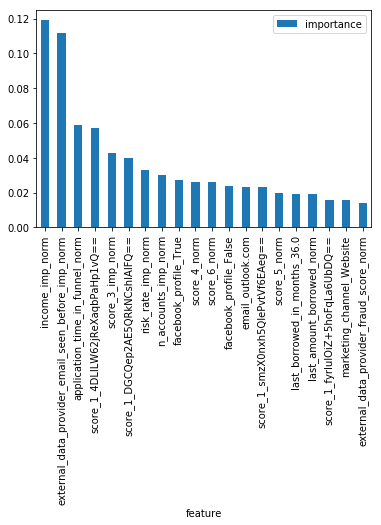

In [318]:
xgb_credit = xgb.fit(X_treino_credit, acquisition_fe_y) 

importances_credit = pd.DataFrame({'feature':X_treino_credit.columns,'importance':np.round(xgb_credit.feature_importances_,3)})
importances_credit_top = importances_credit.sort_values('importance',ascending=False).set_index('feature').head(n=20)

print(importances_credit_top)
importances_credit_top.plot.bar()

Propensão a Gastos

                                                    importance
feature                                                       
facebook_profile_nan                                     9.969
score_1_DGCQep2AE5QRkNCshIAlFQ==                         9.789
external_data_provider_credit_checks_last_month...       9.380
score_2_RO7MTL+j4PH2gNzbhNTq/A==                         7.268
external_data_provider_credit_checks_last_year_1.0       6.652
marketing_channel_Invite-email                           6.146
email_outlook.com                                        5.835
marketing_channel_Website                                5.819
score_2_rJZgTmANW3PjOCQLCcp4iQ==                         5.567
score_4_norm                                             5.356
last_borrowed_in_months_36.0                             5.128
score_2_SaamrHMo23l/3TwXOWgVzw==                         4.869
score_2_emS9xH8CLoRNie2uSmaDAQ==                         4.372
state_rrVbgRNTRyB6auEycsRrpA==                         

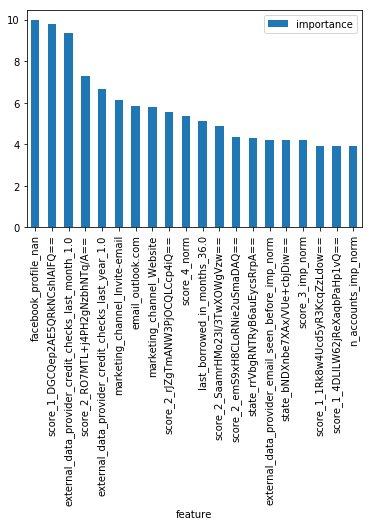

In [319]:
en_s = en.fit(X_treino,spend_fe_y)

importances_s = pd.DataFrame({'feature':X_treino.columns,'importance':np.round(en_s.coef_,3)})
importances_s_top = importances_s.sort_values('importance',ascending=False).set_index('feature').head(n=20)

print(importances_s_top)
importances_s_top.plot.bar()

Risco de Fraude

In [ ]:
xgb_f = xgb.fit(X_treino,spend_fe_y) 

importances_f = pd.DataFrame({'feature':X_treino.columns,'importance':np.round(xgb_f.feature_importances_,3)})
importances_f_top = importances_f.sort_values('importance',ascending=False).set_index('feature').head(n=20)

print(importances_f_top)
importances_f_top.plot.bar()

# Submissions